<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Decision_Tree_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import numpy as np

#getting the wine quality dataset
from sklearn.datasets import load_wine
dataset = load_wine()

from  sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.30, random_state = 45)

In [7]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [8]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  1,  0],
       [ 0, 16,  2],
       [ 0,  1, 19]])

Text(0.5, 764.32, 'Predicted label')

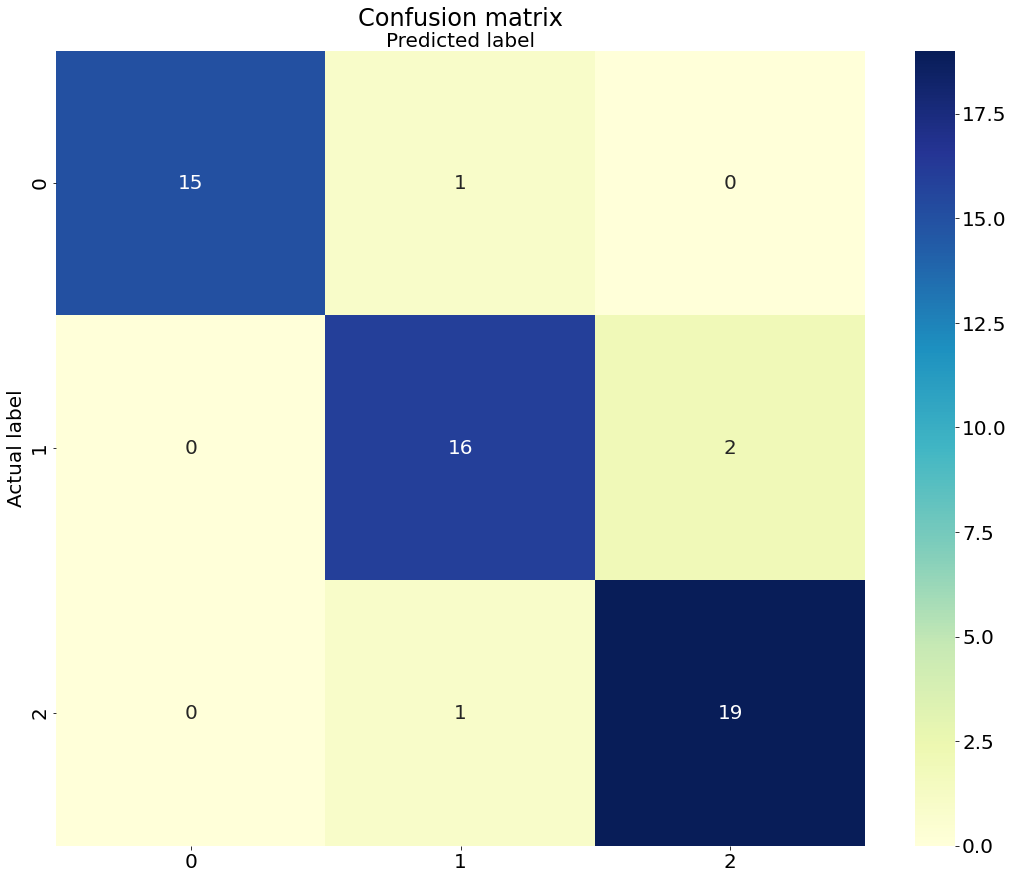

In [10]:
# import required modules
import pandas as pd
import numpy as np
#this is a different plotting package
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='macro'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='macro'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='macro'))))

Accuracy:      0.9259259259259259  
Precision:     0.9312169312169312  
Recall:        0.9254629629629628  
f1 score:      0.9278200308884809  
